In [1]:
!git clone https://github.com/allexeyj/instruction-tuned-sd 
%cd instruction-tuned-sd
!pip install -r requirements.txt 
!pip install xformers
!wget https://huggingface.co/Alexator26/instructPix2PixCartoon_700imgs_train/resolve/main/checkpoint_4860_48run.zip?download=true
!wget https://huggingface.co/Alexator26/instructPix2PixCartoon_700imgs_train/resolve/main/checkpoint_3888_48run.zip?download=true
!wget https://huggingface.co/Alexator26/instructPix2PixCartoon_700imgs_train/resolve/main/checkpoint_2916_48run.zip?download=true
!unzip 'checkpoint_2916_48run.zip?download=true' 
!rm 'checkpoint_2916_48run.zip?download=true'
!unzip 'checkpoint_3888_48run.zip?download=true' 
!rm 'checkpoint_3888_48run.zip?download=true'
!unzip 'checkpoint_4860_48run.zip?download=true' 
!rm 'checkpoint_4860_48run.zip?download=true'

Cloning into 'instruction-tuned-sd'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 215 (delta 31), reused 15 (delta 15), pack-reused 173
Receiving objects: 100% (215/215), 69.51 KiB | 4.63 MiB/s, done.
Resolving deltas: 100% (121/121), done.
/kaggle/working/instruction-tuned-sd
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 65.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not curr

In [24]:
import torch
from diffusers import (AutoencoderKL, DDPMScheduler,
                       StableDiffusionInstructPix2PixPipeline,
                       UNet2DConditionModel)
from diffusers.utils import load_image

model_id = "Alexator26/instructPix2PixCartoon_700imgs_train"
pipeline = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    model_id, torch_dtype=torch.float16, safety)
).to("cuda")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [25]:
def load_unet(pipeline, idx, idxes=[2916, 3888, 4860]):  
    unet = UNet2DConditionModel.from_pretrained(
            f'checkpoint-{idx}',
            subfolder="unet", torch_dtype=torch.float16
        )
    pipeline.unet = unet
    return pipeline.to("cuda")

def stickerify(original_image, num_imgs=4, seed=42):
    original_image = original_image.resize((512, 512))
    generator = torch.Generator(device='cuda:0').manual_seed(42)
    imgs = []
    for idx in range(num_imgs):
        edited_image = pipeline(
                            "Refashion the photo into a sticker.",
                                    image=original_image,
                                    num_inference_steps=20,
                                    image_guidance_scale=1.5,
                                    guidance_scale=7,
                                    generator=generator).images[0]
        imgs.append(edited_image)
    return imgs

def show(imgs):
    for img in imgs:
        display(img)


In [43]:
imgs = ['https://i.pinimg.com/736x/54/a8/1d/54a81ddd64713432544d08edd3135313.jpg']
for i in range(len(imgs)):
    try:
        imgs[i] = load_image(imgs[i])
    except:
        imgs[i] = None
imgs = [i for i in imgs if i != None]

In [44]:
from tqdm.auto import tqdm

pipeline = load_unet(pipeline, 4860)
results = []
for img in tqdm(imgs):
    results.extend(stickerify(img))


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

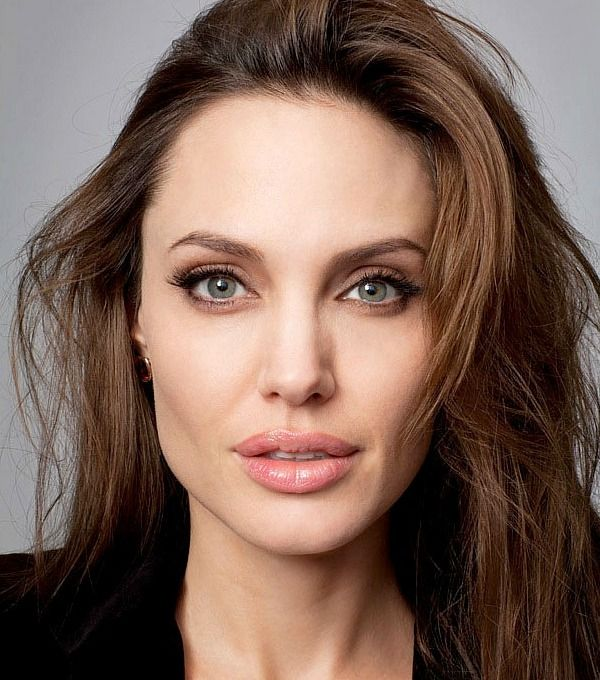

In [45]:
show(imgs)

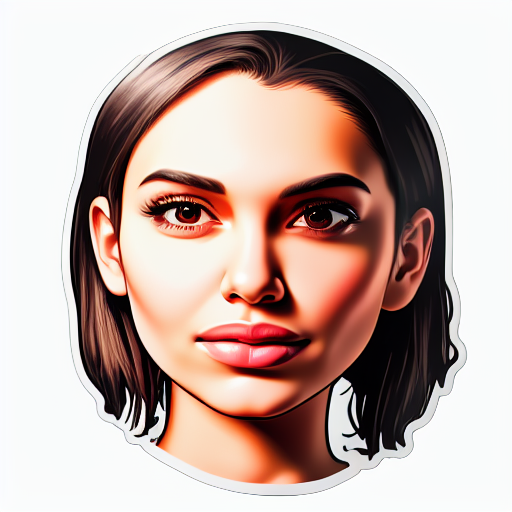

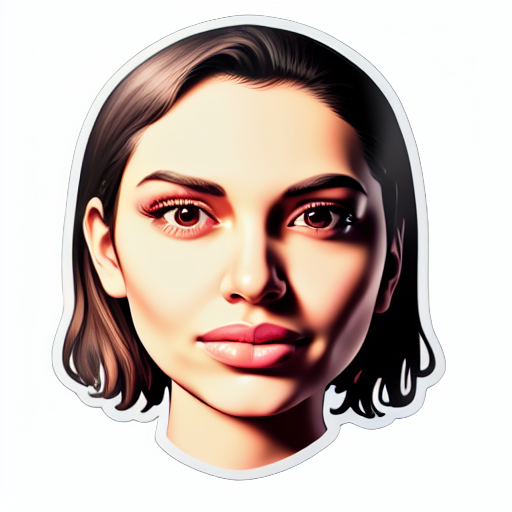

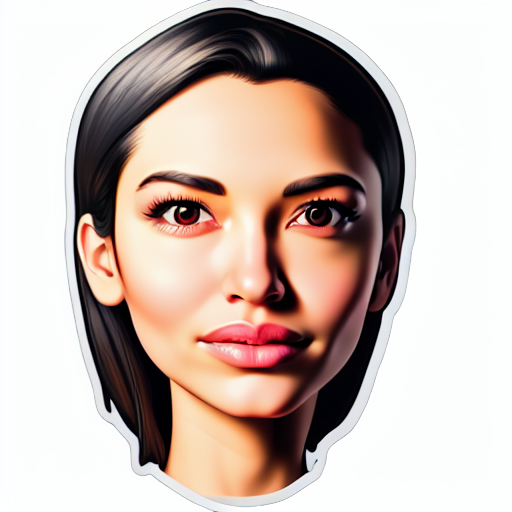

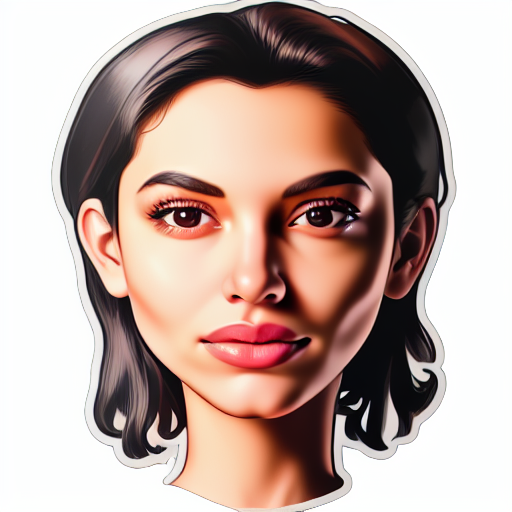

In [46]:
show(results)